In [1]:
import json
import pandas as pd
from sklearn import linear_model, model_selection, preprocessing
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open('watches.json', 'r') as fh:
    data = json.load(fh)


In [3]:
l = len(data)
price = []
rating = []
offer = []
buyer = []
for i in range(0, l):
    price += data[i]['price']
    rating += data[i]['rating']
    offer += data[i]['offer']
    buyer += data[i]['buyer']

In [4]:
df = pd.DataFrame({'price':price, 'rating':rating, 'offer':offer, 'buyer':buyer})
df.head()

,buyer,offer,price,rating
0,662,47,368,3.6
1,68,88,389,4.1
2,2863,79,270,3.5
3,2647,85,189,3.7
4,2890,71,341,4.0


In [5]:
# scaling 
data = df.values
data = preprocessing.scale(data)

x  = data[:, 1:]
y = data[:, 0:1]

In [6]:
# split the data into train and test data
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.3, random_state=42)

In [7]:
# using sklearn 
lgr = linear_model.LinearRegression()
lgr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
y_sklearn = lgr.predict(x_test)

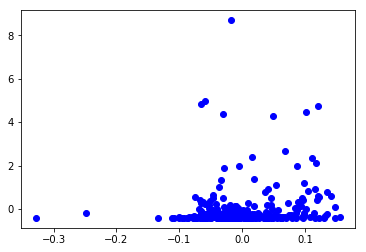

In [9]:
fig ,aux = plt.subplots()
aux.plot( y_sklearn, y_test,'bo')
plt.show()

In [10]:
def cost_function(theta, x, y, m):
    return sum((np.dot(x, theta)-y)**2)[0]/(2*m)

In [11]:
# gradient descent algorithm
def learn_parameters(theta, x, y, m, e=1e-5, alpha=0.5):
    no_of_steps = 0
    while True:
        cost_prev = cost_function(theta, x, y,m)
        # parameters update step
        theta -= (alpha*m)* (np.dot(x.T, (np.dot(x, theta)-y)))
        cost_curr = cost_function(theta, x,y,m)
        
        
        if abs(cost_prev - cost_curr) < e:
            break
        no_of_steps += 1
        
    return (theta, no_of_steps)

In [12]:
m, n = x_train.shape[0], x_train.shape[1]

ones = np.ones((m,1))

x_train_ones = np.hstack([ones, x_train])


m, n = x_test.shape[0], x_test.shape[1]

ones = np.ones((m,1))

x_test_ones = np.hstack([ones, x_test])


In [13]:
# initialize thetas
theta = np.zeros((n+1, 1))

# define error tolerance
e = 1e-5

# define learning rate
alpha = 0.000001

learn_parameters(theta, x_train_ones, y_train, m, e, alpha)

(array([[ 0.0035341 ],
        [-0.05580164],
        [-0.04153145],
        [ 0.0280891 ]]), 21)

In [14]:
lgr.intercept_

array([0.00319157])

In [15]:
lgr.coef_

array([[-0.06114446, -0.04873516,  0.02956577]])

In [17]:
y_grad = np.dot(x_test_ones, theta)

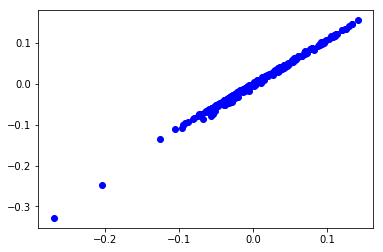

In [18]:
# solutions; gradient descant vs sklearn
fig , aux = plt.subplots()
aux.plot(y_grad, y_sklearn, 'bo')
plt.show()